### **🟡 Import Libraries**

In [130]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

🟡 Load and Read Dataset

In [131]:
data = pd.read_csv ('.\dataset\student_loan_train.csv')
#data

🟡 Convert to Numpy Array

In [132]:
train_set = np.array(data)
#train_set

In [133]:
train_set.shape     #retrieves the dimensions (e.g., number of rows and columns) of a dataset

(10, 2)

🟡 Split x and y

In [134]:
x_train = train_set [: , 0]     #The code snippet assigns the values of the first column of the "train_set" data to the variable "x_train"
#x_train     

In [135]:
y_train = train_set [: , 1]     #The code snippet assigns the values of the second column of the "train_set" data to the variable "y_train"
y_train     

array([ 347.1,  392.8,  478.8,  541.3,  633.3,  714.4,  803.5,  866.3,
        959.9, 1071. ])

🟡 Visualize

In [136]:
#plt.scatter (x_train, y_train)

In [137]:
#plt.plot (x_train, y_train, 'o-')

### **🔴 Model**

In [138]:
def linear_regression (x, w0, w1):
    y_hat = w1*x + w0
    return y_hat

# y_hat is the predicted or estimated value of the dependent variable
# x is the independent variable
# w1 is the coefficient (weight) associated with the independent variable x
# w0 is the y-intercept  (the value of y when x is zero).

🔴 Pass Data to the Model

In [139]:
w0 = np.random.randn()
w1 = np.random.randn()
w0, w1

(-0.4277996316114721, -0.022243202680763213)

In [140]:
y_hat = linear_regression (x_train, w0, w1)
y_hat

array([-0.51677244, -0.53901565, -0.56125885, -0.58350205, -0.60574525,
       -0.62798846, -0.65023166, -0.67247486, -0.69471806, -0.71696127])

In [141]:
#plt.scatter (x_train, y_train)
#plt.plot(x_train, y_hat, 'r')

### **🔵 Loss Function**

💥 Error = | Target Value - Predicted Value |
<br>💥 Commonly loss functions used in regression:
<br>💢 1- Mean Absolute Error (MAE)
<br>💢 2- Mean Squared Error (MSE)
<br>$
\begin{align}
L &= \frac{1}{n} \sum_{i=1}^n (w_1 \times x + w_0-y_i)^2
\end{align}
$

##### **🔵 Mean Squared Error (MSE)**

$
\begin{align}
MSE &= \frac{1}{n} \sum_{i=1}^n (\hat{y}_i-y_i)^2
\end{align}
$

In [142]:
def mse(y_hat, y):
    loss = np.mean((y_hat - y)**2)
    return loss

In [143]:
mse(y_train, y_hat)

518169.77908114594

##### **🔵 Mean Absolute Error (MAE)**

$
\begin{align}
MAE &= \frac{1}{n} \sum_{i=1}^n |\hat{y}_i-y_i|
\end{align}
$

In [144]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [145]:
mae(y_train, y_hat)

681.456866854398

##### **🔵 Plot loss surface**

###### **🔵 MSE**

In [146]:
w0 = 0
w1 = np.linspace(-100, 200, 1000)

mse_loss = []
for w1i in w1:
    y_hati = linear_regression(x_train, w0, w1i)
    mse_loss.append(mse(y_train, y_hati))
mse_loss = np.array(mse_loss)

mse_loss.shape, w1.shape

((1000,), (1000,))


 w1 value at minimum MSE loss: 80.18018018018017 



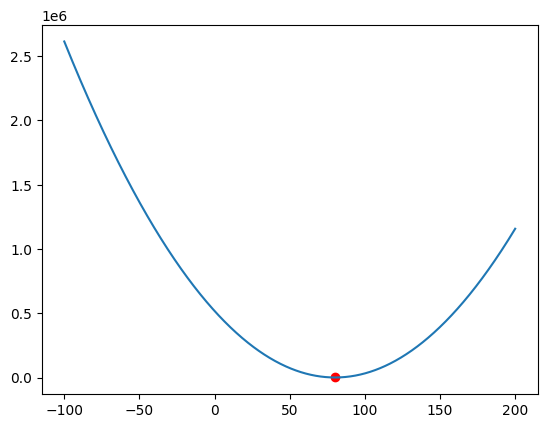

In [147]:
plt.plot(w1, mse_loss)

loss_min_index = np.argmin(mse_loss)
loss_min = mse_loss[loss_min_index]
plt.scatter(w1[loss_min_index], loss_min, color='r')

print("\n w1 value at minimum MAE loss:", w1[loss_min_index],"\n")

###### **🔵 MAE**

In [148]:
w0 = 0
w1 = np.linspace(-100, 200, 1000)

mae_loss = []
for w1i in w1:
    y_hati = linear_regression(x_train, w0, w1i)
    mae_loss.append(mae(y_train, y_hati))
mae_loss = np.array(mae_loss)

mae_loss.shape, w1.shape

((1000,), (1000,))


 w1 value at minimum MAE loss: 79.8798798798799 



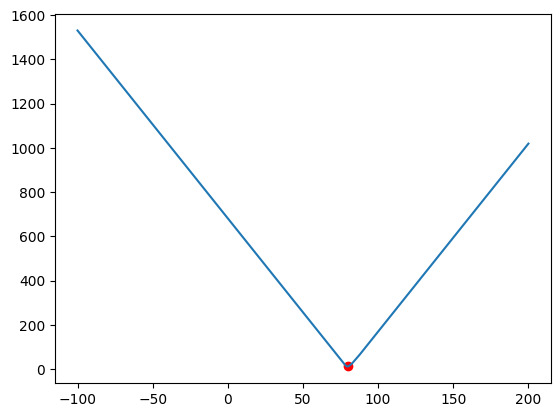

In [149]:
plt.plot(w1, mae_loss)

loss_min_index = np.argmin(mae_loss)
loss_min = mae_loss[loss_min_index]
plt.scatter(w1[loss_min_index], loss_min, color='r')

print("\n w1 value at minimum MAE loss:", w1[loss_min_index],"\n")